## Data Input
How to read and plot data in PyFloc

In [1]:
%matplotlib notebook
import data

Read data from a single experiment

In [2]:
E = data.Experiment('../examples/data/flowc/levine_13dim.fcs')

/Users/simone/anaconda3/lib/python3.6/site-packages/fcsparser/api.py:332: UserWarning: The default channel names (defined by the $PnS parameter in the FCS file) were not unique. To avoid problems in downstream analysis, the channel names have been switched to the alternate channel names defined in the FCS file. To avoid seeing this warning message, explicitly instruct the FCS parser to use the alternate channel names by specifying the channel_naming parameter.
  warnings.warn(msg)


Read 167044 samples from ../examples/data/flowc/levine_13dim.fcs


In [ ]:
E.show('CD4','CD8')

Creata a collection of experiments

In [3]:
C = data.Collection()
C.add_experiment(E, condition = 'test1', labels = E.get_data_features('label'))
C.add_experiment(E, condition = 'test2')

/Users/simone/anaconda3/lib/python3.6/site-packages/fcsparser/api.py:332: UserWarning: The default channel names (defined by the $PnS parameter in the FCS file) were not unique. To avoid problems in downstream analysis, the channel names have been switched to the alternate channel names defined in the FCS file. To avoid seeing this warning message, explicitly instruct the FCS parser to use the alternate channel names by specifying the channel_naming parameter.
  warnings.warn(msg)


In [ ]:
C.show_scatter(['CD4','CD8'])

/Users/simone/anaconda3/lib/python3.6/site-packages/fcsparser/api.py:332: UserWarning: The default channel names (defined by the $PnS parameter in the FCS file) were not unique. To avoid problems in downstream analysis, the channel names have been switched to the alternate channel names defined in the FCS file. To avoid seeing this warning message, explicitly instruct the FCS parser to use the alternate channel names by specifying the channel_naming parameter.
  warnings.warn(msg)


<IPython.core.display.Javascript object>


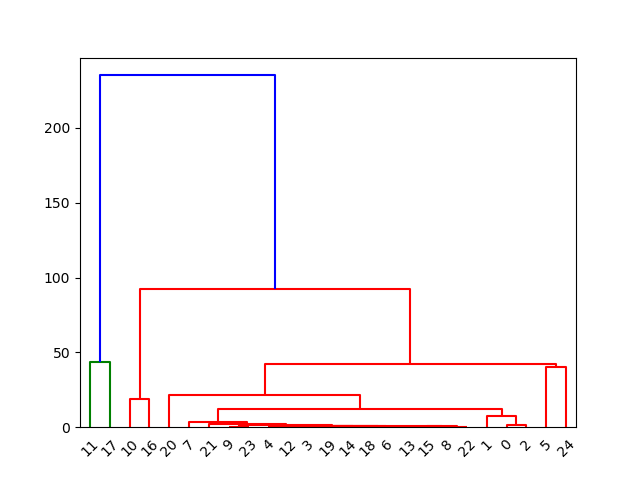

<IPython.core.display.Javascript object>


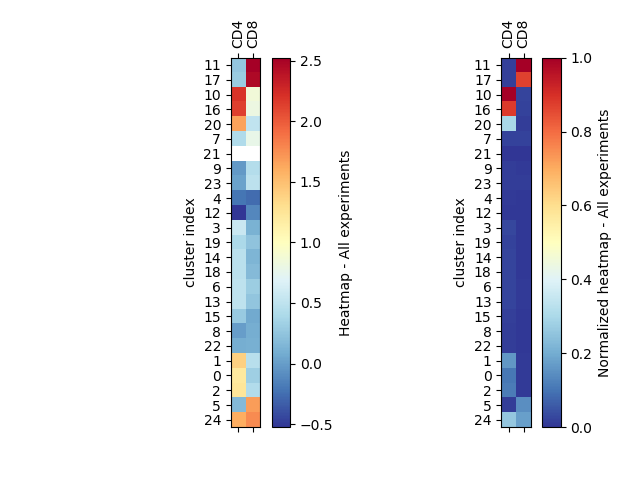

/Users/simone/Desktop/FLOW/pyfloc/pyfloc/data.py:473: RuntimeWarning: invalid value encountered in log10
  cax = ax.matshow(np.log10(average_features[clusters_order,:]), cmap = 'RdYlBu_r')


<IPython.core.display.Javascript object>


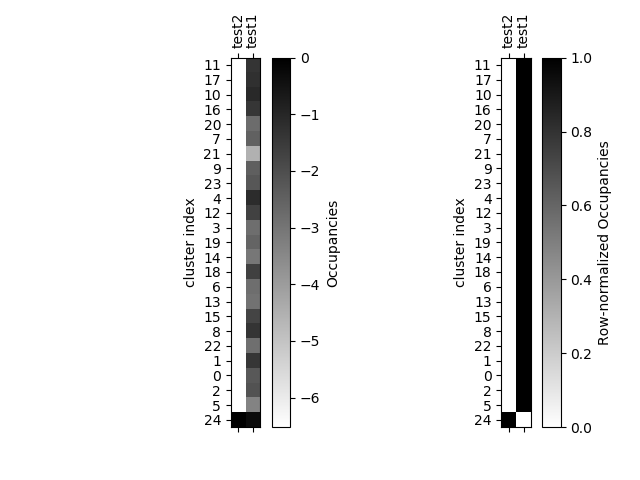

In [4]:
C.show_distributions(['CD4','CD8'])